In [2]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
path1 = r'C:\WorkStudy\mNG_Clover_paper\20190916\Analysis\Mask'
filename = "5XmNG2_1-3_FITC_background.csv"
Excel = pd.read_csv(path1 + filename)
Background = pd.read_csv(r'C:\WorkStudy\mNG_Clover_paper\20190916\Analysis\Mask\5XmNG2_1-3_FITC_background.csv')
Excel.tail()

SyntaxError: EOL while scanning string literal (<ipython-input-5-83dabbead874>, line 1)

In [40]:
Excel = Excel.iloc[0:2526,:]

In [48]:
#use median of each cell to represent the overall intensity
Intensity = Excel[["Median"]]
Intensity.head()

,Median
0,837.0
1,704.0
2,967.0
3,696.0
4,956.0


In [42]:
Background

,,Label,Area,Mean,Min,Max,Circ.,Median,AR,Round,Solidity,MinThr,MaxThr
0,1,5XmNG2_1-3.tif,693995.8281,719.1318,555,5594,0.3067,713,1.0479,0.9542,0.3905,1,65535


In [100]:
#substract background from autofluorescence
Substract_background = Excel.Median.apply(lambda x : x-713 )
Intensity.loc["subbg"] = Substract_background.copy()
Intensity

C:\Users\16032\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Median,subbg
0,837.0,124.0
1,704.0,-9.0
2,967.0,254.0
3,696.0,-17.0
4,956.0,243.0
...,...,...
2522,759.0,46.0
2523,716.0,3.0
2524,866.0,153.0
2525,743.0,30.0


In [67]:
Intensity2 = Intensity.sort_values("subbg")

In [86]:
#exclude bottom 10% cells
Intensity2.reset_index(inplace=True, drop=True)
Intensity3 = Intensity2.iloc[150:2250,:]
Intensity3.reset_index(inplace=True, drop=True)
Intensity3

,Median,subbg
0,715.0,2.0
1,715.0,2.0
2,715.0,2.0
3,715.0,2.0
4,715.0,2.0
...,...,...
2095,1739.0,1026.0
2096,1755.0,1042.0
2097,1756.0,1043.0
2098,1764.0,1051.0


(array([159., 193., 217., 210., 116.,  88.,  50.,  57.,  42.,  28.,  30.,
         21.,  22.,  26.,  20.,  26.,  14.,  20.,  13.,  17.,  13.,  16.,
         13.,  18.,  18.,  14.,   8.,   8.,  17.,  10.,  10.,   9.,   8.,
         15.,   7.,  11.,   6.,   9.,   8.,  13.,   6.,   8.,  14.,  10.,
         11.,   9.,   6.,   3.,   6.,   7.,   9.,   4.,   9.,   8.,   3.,
          9.,   5.,   7.,   8.,  10.,   9.,   5.,   7.,   6.,   8.,  11.,
          5.,   6.,   7.,   6.,   5.,   1.,   8.,   7.,   6.,   4.,   4.,
          4.,   2.,   7.,   8.,   4.,  13.,   2.,   4.,   5.,   5.,   4.,
          5.,   5.,   3.,   5.,   3.,   3.,   5.,   4.,   2.,   3.,   4.,
          6.,   1.,   3.,   2.,   3.,   8.,   5.,   5.,   5.,   4.,   1.,
          5.,   1.,   4.,   6.,   5.,   1.,   3.,   4.,   3.,   2.,   7.,
          3.,   1.,   1.,   2.,   2.,   6.,   1.,   0.,   1.,   0.,   4.,
          3.,   1.,   4.,   2.,   2.,   5.,   1.,   3.,   2.,   3.,   2.,
          1.,   3.,   1.,   1.,   0., 

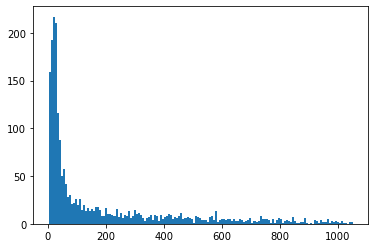

In [103]:
plt.hist(Intensity3.subbg, bins=150)